# Laurentia tectonic summary

This Jupyter notebook develops a summary figure of the tectonic history of Laurentia. It is associated with the manuscript:

**The Precambrian paleogeography of Laurentia** written by Nicholas L. Swanson-Hysell for a book entitled *Ancient Supercontinents and the Paleogeography of the Earth*

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from matplotlib import gridspec
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
tectonic_events = pd.read_csv('../Data/tectonic_events.csv')
tectonic_events

,event_type,name,start,end,reference,comment,location
0,orogeny_collisional,Alleghanian,325,290,NaN,Pangea assembly,NaN
1,orogeny_microcontinent,Acadian,420,390,Wilson2017a,Carolinia and Avalonia collision,NaN
2,orogeny_accretionary,Taconic,465,445,Macdonald2017a,arc accretion,NaN
3,orogeny_collisional,Grenvillian,1090,980,Rivers2008a,NaN,NaN
4,orogeny_microcontinent,Llano,1150,1115,Mosher2008a and Barker2009,Mosher's model is of arc-continent collision ...,NaN
5,orogeny_accretionary,Shawinigan,1210,1160,NaN,NaN,NaN
6,orogeny_accretionary,Elzevirian,1245,1225,NaN,NaN,NaN
7,orogeny_accretionary,Granite-Rhyolite Province,1500,1430,Bickford2015a,NaN,NaN
8,orogeny_accretionary,Mazatzal,1650,1600,Whitmeyer2007a,NaN,NaN
9,orogeny_accretionary,Yavapai,1710,1680,Whitmeyer2007a,NaN,NaN


In [8]:
timescale = pd.read_csv('../Data/ages.csv')
Prot_Phan_timescale = timescale[4:]
Prot_Phan_timescale

,era,b_age,t_age,abbr,color
4,Paleoproterozoic,2500,1600,Paleoprot.,white
5,Mesoproterozoic,1600,1000,Mesoprot.,white
6,Neoproterozoic,1000,539,Neoprot.,white
7,Phanerozoic,539,0,Phan.,white


In [9]:
Precambrian_poles = pd.read_csv('../Data/Leirubakki_poles_w_PlateID.csv')
Laurentia_Precambrian_poles = Precambrian_poles[Precambrian_poles['Terrane']=='Laurentia']
Phanerozoic_poles = pd.read_csv('../Data/Torsvik_Laurentia_Pole_Compilation.csv')
Phanerozoic_poles.head(1)

,Q,A95,Com,Formation,Lat,Lon,CLat,CLon,RLat,RLon,EULER,Age,GPDB RefNo/Reference
0,5,4.8,N,USGS SW North America composite,-86.3,5.7,-86.3,5.7,,,,0.5,Mankinen (2008)


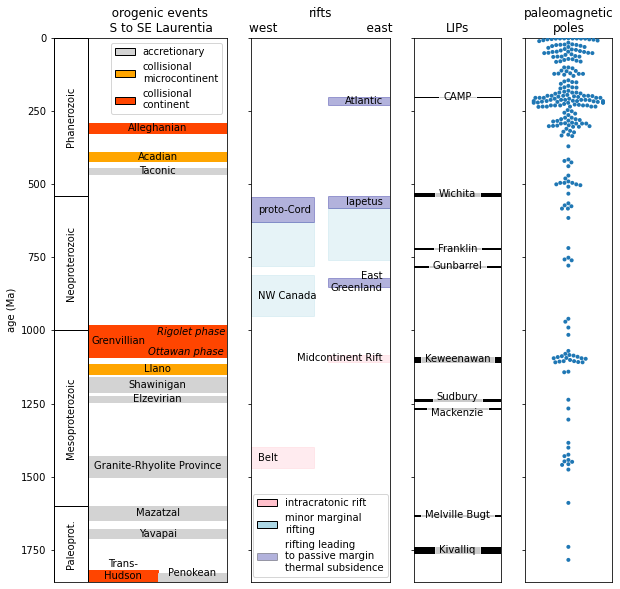

In [13]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(1, 4, width_ratios=[2.5, 2, 1.25, 1.25])

ax_orogeny = fig.add_subplot(gs[0])

for event in tectonic_events.index:
    
    if tectonic_events['event_type'][event] == 'orogeny_collisional':
        start = tectonic_events['start'][event]
        end = tectonic_events['end'][event]
        name = tectonic_events['name'][event]
        if tectonic_events['name'][event] == 'Trans-Hudson':
            rect = plt.Rectangle((0.2, end), 0.4, start-end, color='orangered')
            ax_orogeny.add_patch(rect)
            plt.text(0.4,end,'Trans-\nHudson',
                 verticalalignment='center',horizontalalignment='center')
        elif tectonic_events['name'][event] == 'Grenvillian':
            rect = plt.Rectangle((0.2, end), 1, start-end, color='orangered')
            ax_orogeny.add_patch(rect)
            plt.text(0.22,(start+end)/2,name,
                     verticalalignment='center',horizontalalignment='left')
            plt.text(0.98,1075,'Ottawan phase',fontstyle='italic',
                     verticalalignment='center',horizontalalignment='right')
            plt.text(0.99,1005,'Rigolet phase',fontstyle='italic',
                     verticalalignment='center',horizontalalignment='right')
        else:   
            rect = plt.Rectangle((0.2, end), 1, start-end, color='orangered')
            ax_orogeny.add_patch(rect)
            plt.text(0.6,(start+end)/2,name,
                     verticalalignment='center',horizontalalignment='center')
        
    elif tectonic_events['event_type'][event] == 'orogeny_microcontinent':
        start = tectonic_events['start'][event]
        end = tectonic_events['end'][event]
        name = tectonic_events['name'][event]
        rect = plt.Rectangle((0.2, end), 1, start-end, color='orange')
        ax_orogeny.add_patch(rect)
        plt.text(0.6,(start+end)/2,name,
                 verticalalignment='center',horizontalalignment='center')
        
    elif tectonic_events['event_type'][event] == 'orogeny_accretionary':
        start = tectonic_events['start'][event]
        end = tectonic_events['end'][event]
        name = tectonic_events['name'][event]
        if tectonic_events['name'][event] == 'Penokean':
            rect = plt.Rectangle((0.6, end), 0.4, start-end, color='lightgrey')
            ax_orogeny.add_patch(rect)
            plt.text(0.8,end,'Penokean',
                 verticalalignment='center',horizontalalignment='center')
        else:
            rect = plt.Rectangle((0.2, end), 1, start-end, color='lightgrey')
            ax_orogeny.add_patch(rect)
            plt.text(0.6,(start+end)/2,name,
                     verticalalignment='center',horizontalalignment='center')
        
for era in Prot_Phan_timescale.index: 
    start = Prot_Phan_timescale['b_age'][era]
    end = Prot_Phan_timescale['t_age'][era]
    rect = plt.Rectangle((0, end), 0.2, start-end, facecolor='white',edgecolor='black',linestyle='-')
    ax_orogeny.add_patch(rect)
    if Prot_Phan_timescale['abbr'][era] == 'Paleoprot.':
        name = Prot_Phan_timescale['abbr'][era]
        plt.text(0.1,(1860+end)/2,name,rotation=90,
                 verticalalignment='center',horizontalalignment='center')
    else:
        name = Prot_Phan_timescale['era'][era]
        plt.text(0.1,(start+end)/2,name,rotation=90,
             verticalalignment='center',horizontalalignment='center')

plt.title('          orogenic events\n           S to SE Laurentia')
plt.ylim(1860,0)
plt.ylabel('age (Ma)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

legend_elements = [Patch(facecolor='lightgrey', edgecolor='k',
                         label='accretionary'),
                   Patch(facecolor='orange', edgecolor='k',
                         label='collisional\nmicrocontinent'),
                   Patch(facecolor='orangered', edgecolor='k',
                         label='collisional\ncontinent')]

plt.legend(handles=legend_elements, loc='upper right', fontsize = 10)

ax_rift = fig.add_subplot(gs[1])

for event in tectonic_events.index:
    
    start = tectonic_events['start'][event]
    end = tectonic_events['end'][event]
    name = tectonic_events['name'][event]
    
    if tectonic_events['location'][event] == 'west':
        start_x = 0
        plt.text(0.05,(start+end)/2,name,
                 verticalalignment='center',horizontalalignment='left')
    
    elif tectonic_events['location'][event] == 'east':
        start_x = 0.55
        if name == 'East Greenland':
            plt.text(0.95,(start+end)/2,'East\nGreenland',
                     verticalalignment='center',horizontalalignment='right')
        else:
            plt.text(0.95,(start+end)/2,name,
                     verticalalignment='center',horizontalalignment='right')
    
    if tectonic_events['event_type'][event] == 'rift_intracratonic':
        rect = plt.Rectangle((start_x, end), 0.45, start-end, color='pink', alpha=0.3)
        ax_rift.add_patch(rect)

    elif tectonic_events['event_type'][event] == 'rift':
        rect = plt.Rectangle((start_x, end), 0.45, start-end, color='lightblue', alpha=0.3)
        ax_rift.add_patch(rect)
        
    elif tectonic_events['event_type'][event] == 'rift_passive_margin':
        rect = plt.Rectangle((start_x, end), 0.45, start-end, color='darkblue', alpha=0.3)
        ax_rift.add_patch(rect)
        
             
plt.title('rifts\nwest                       east')
plt.ylim(1860,0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,      # ticks along the left edge are off
    labelleft=False) # labels along the bottom edge are off

legend_elements = [Patch(facecolor='pink', edgecolor='k',
                         label='intracratonic rift'),
                   Patch(facecolor='lightblue', edgecolor='k',
                         label='minor marginal\nrifting'),
                   Patch(facecolor='darkblue', edgecolor='k', alpha=0.3,
                         label='rifting leading\nto passive margin\nthermal subsidence')]

plt.legend(handles=legend_elements, loc='lower center', fontsize = 10)

ax_LIP = fig.add_subplot(gs[2])

for event in tectonic_events.index:
    if tectonic_events['event_type'][event] == 'LIP':
        start = tectonic_events['start'][event]
        end = tectonic_events['end'][event]
        name = tectonic_events['name'][event]
        rect = plt.Rectangle((0, end), 1, start-end, color='k')
        ax_LIP.add_patch(rect)
        if name == 'Sudbury':
            text = plt.text(0.5,(start+end)/2-10,name,
                     verticalalignment='center',horizontalalignment='center')
            text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))
        elif name == 'Mackenzie':
            text = plt.text(0.5,(start+end)/2+15,name,
                     verticalalignment='center',horizontalalignment='center')
            text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))
        else:
            text = plt.text(0.5,(start+end)/2,name,
                     verticalalignment='center',horizontalalignment='center')
            text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))
            

plt.title('LIPs')
plt.ylim(1860,0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,      # ticks along the left edge are off
    labelleft=False) # labels along the bottom edge are off

ax_Poles = fig.add_subplot(gs[3])

sns.swarmplot(y=Laurentia_Precambrian_poles['nominal age'].tolist()+Phanerozoic_poles['Age'].tolist(),size=4)
plt.title('paleomagnetic\npoles')
plt.ylim(1860,0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,      # ticks along the left edge are off
    labelleft=False) # labels along the bottom edge are off

#plt.tight_layout()
plt.savefig('../Figures/Tectonic_history.pdf', bbox_inches = 'tight', pad_inches = 0)